In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "북구"
region_code = "10"
target_date = "2018-01-04"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("북구2018_1q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2018-01-04,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6500,북구,8175,북구,1675,25.77%,"7,338"
1,2018-01-04,간장,오복왕표 0.9ℓ 1병,5200,북구,6350,북구,1150,22.12%,"5,775"
2,2018-01-04,고등어,30㎝정도 500g 1마리,3222,북구,3450,북구,228,7.08%,"3,336"
3,2018-01-04,달걀,오경슈퍼란60g정도 10개,2780,북구,3060,북구,280,10.07%,"2,920"
4,2018-01-04,닭고기,육계 1.0㎏,6750,북구,8100,북구,1350,20.0%,"7,425"
5,2018-01-04,대파,1.0㎏,2780,북구,3260,북구,480,17.27%,"3,020"
6,2018-01-04,돼지고기,삼겹살 500g,9200,북구,10900,북구,1700,18.48%,"10,050"
7,2018-01-04,두부,500g 판두부(국산포장두부 420g) 1모,3780,북구,4365,북구,585,15.48%,"4,073"
8,2018-01-04,라면,신라면 120g 1봉지,676,북구,680,북구,4,0.59%,678
9,2018-01-04,맥주,하이트 500㎖ 1병,1410,북구,1460,북구,50,3.55%,"1,435"


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "북구"
region_code = "10"
target_date = "2018-04-12"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("북구2018_2q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2018-04-12,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6675,북구,6900,북구,225,3.37%,"6,788"
1,2018-04-12,간장,오복왕표 0.9ℓ 1병,5200,북구,6350,북구,1150,22.12%,"5,775"
2,2018-04-12,고등어,30㎝정도 500g 1마리,3250,북구,5333,북구,2083,64.09%,"4,292"
3,2018-04-12,달걀,오경슈퍼란60g정도 10개,2280,북구,3060,북구,780,34.21%,"2,670"
4,2018-04-12,닭고기,육계 1.0㎏,8480,북구,9400,북구,920,10.85%,"8,940"
5,2018-04-12,대파,1.0㎏,1980,북구,2830,북구,850,42.93%,"2,405"
6,2018-04-12,돼지고기,삼겹살 500g,6900,북구,9250,북구,2350,34.06%,"8,075"
7,2018-04-12,두부,500g 판두부(국산포장두부 420g) 1모,3780,북구,4365,북구,585,15.48%,"4,073"
8,2018-04-12,라면,신라면 120g 1봉지,676,북구,680,북구,4,0.59%,678
9,2018-04-12,맥주,하이트 500㎖ 1병,1410,북구,1460,북구,50,3.55%,"1,435"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "북구"
region_code = "10"
target_date = "2018-07-05"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("북구2018_3q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2018-07-05,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6900,북구,8175,북구,1275,18.48%,"7,538"
1,2018-07-05,간장,오복왕표 0.9ℓ 1병,5200,북구,6350,북구,1150,22.12%,"5,775"
2,2018-07-05,달걀,오경슈퍼란60g정도 10개,2350,북구,2380,북구,30,1.28%,"2,365"
3,2018-07-05,닭고기,육계 1.0㎏,6800,북구,8480,북구,1680,24.71%,"7,640"
4,2018-07-05,대파,1.0㎏,1580,북구,3560,북구,1980,125.32%,"2,570"
5,2018-07-05,돼지고기,삼겹살 500g,8900,북구,11950,북구,3050,34.27%,"10,425"
6,2018-07-05,두부,500g 판두부(국산포장두부 420g) 1모,3780,북구,4365,북구,585,15.48%,"4,073"
7,2018-07-05,라면,신라면 120g 1봉지,676,북구,680,북구,4,0.59%,678
8,2018-07-05,맥주,하이트 500㎖ 1병,1410,북구,1460,북구,50,3.55%,"1,435"
9,2018-07-05,무,2.0㎏ 1개,1480,북구,1980,북구,500,33.78%,"1,730"


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "북구"
region_code = "10"
target_date = "2018-10-11"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("북구2018_4q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2018-10-11,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6900,북구,8925,북구,2025,29.35%,"7,913"
1,2018-10-11,간장,오복왕표 0.9ℓ 1병,5200,북구,6350,북구,1150,22.12%,"5,775"
2,2018-10-11,고등어,30㎝정도 500g 1마리,2950,북구,3500,북구,550,18.64%,"3,225"
3,2018-10-11,달걀,오경슈퍼란60g정도 10개,2350,북구,2580,북구,230,9.79%,"2,465"
4,2018-10-11,닭고기,육계 1.0㎏,7100,북구,9430,북구,2330,32.82%,"8,265"
5,2018-10-11,대파,1.0㎏,2980,북구,7000,북구,4020,134.9%,"4,990"
6,2018-10-11,돼지고기,삼겹살 500g,7950,북구,9950,북구,2000,25.16%,"8,950"
7,2018-10-11,두부,500g 판두부(국산포장두부 420g) 1모,1500,북구,4365,북구,2865,191.0%,"2,933"
8,2018-10-11,라면,신라면 120g 1봉지,676,북구,680,북구,4,0.59%,678
9,2018-10-11,맥주,하이트 500㎖ 1병,1450,북구,1460,북구,10,0.69%,"1,455"


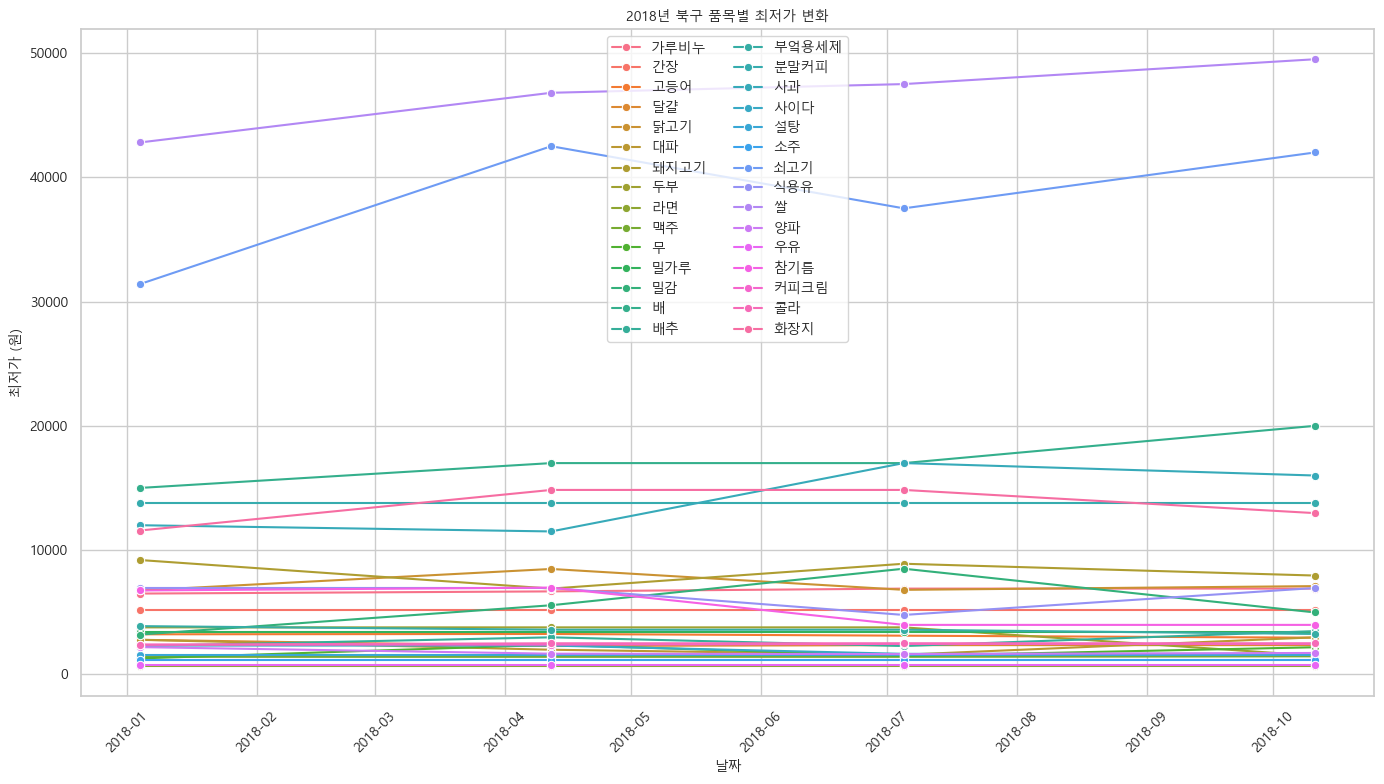

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("북구2018_1q.csv")
q2 = pd.read_csv("북구2018_2q.csv")
q3 = pd.read_csv("북구2018_3q.csv")
q4 = pd.read_csv("북구2018_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2018년 북구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("북구2018_min.csv", index=False, encoding="utf-8-sig")

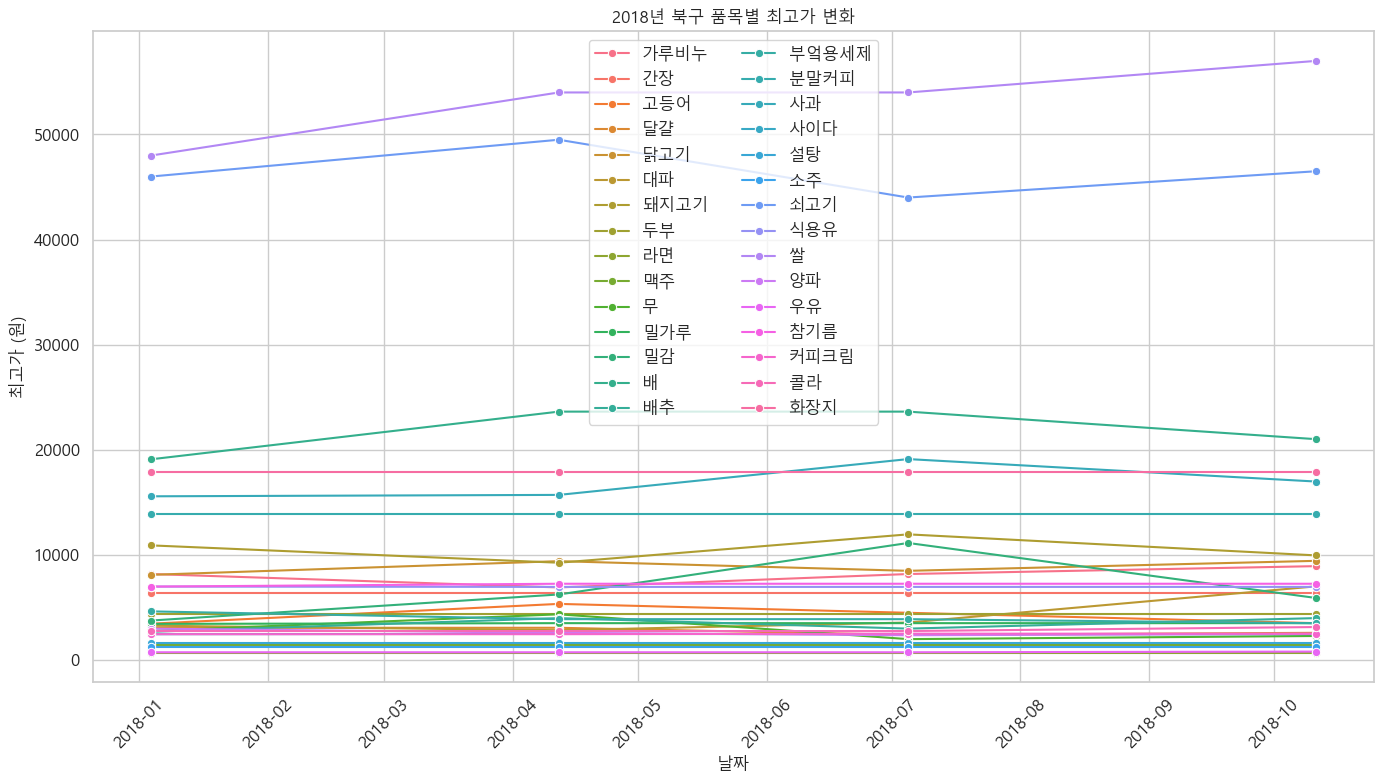

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("북구2018_1q.csv")
q2 = pd.read_csv("북구2018_2q.csv")
q3 = pd.read_csv("북구2018_3q.csv")
q4 = pd.read_csv("북구2018_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2018년 북구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("북구2018_max.csv", index=False, encoding="utf-8-sig")